# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [25]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, RocCurveDisplay

from sklearn.model_selection import GridSearchCV
from scipy import stats

from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree




%matplotlib inline


## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
#dataset = pd.read_csv("./data/loan_data.csv", comment="#")
dataset = pd.read_csv("https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv", comment="#")


# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

**Antes de separar los datos para entrenamiento y validacion, vamos a analizar como se componen los mismos.**

In [3]:
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [4]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1854 entries, 0 to 1853
Series name: TARGET
Non-Null Count  Dtype
--------------  -----
1854 non-null   int64
dtypes: int64(1)
memory usage: 14.6 KB


In [5]:
y.value_counts()

TARGET
0    1545
1     309
Name: count, dtype: int64

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     1854 non-null   int64  
 1   MORTDUE  1854 non-null   float64
 2   VALUE    1854 non-null   float64
 3   YOJ      1854 non-null   float64
 4   DEROG    1854 non-null   float64
 5   DELINQ   1854 non-null   float64
 6   CLAGE    1854 non-null   float64
 7   NINQ     1854 non-null   float64
 8   CLNO     1854 non-null   float64
 9   DEBTINC  1854 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 145.0 KB


In [7]:
X.value_counts()

LOAN   MORTDUE   VALUE     YOJ   DEROG  DELINQ  CLAGE       NINQ  CLNO  DEBTINC  
1700   30548.0   40320.0   9.0   0.0    0.0     101.466002  1.0   8.0   37.113614    1
21400  90912.0   121714.0  3.0   0.0    0.0     221.515426  2.0   26.0  34.885541    1
       64378.0   99343.0   18.0  0.0    0.0     627.702390  1.0   23.0  20.688715    1
21300  183386.0  230443.0  1.0   0.0    0.0     288.373698  1.0   26.0  39.334879    1
       143676.0  181960.0  8.0   0.0    0.0     313.187465  0.0   17.0  43.645349    1
                                                                                    ..
13500  67180.0   85634.0   5.0   0.0    0.0     147.355313  0.0   35.0  28.522553    1
       63572.0   102739.0  7.0   0.0    0.0     250.561357  0.0   12.0  34.913793    1
       48832.0   144065.0  1.0   0.0    0.0     268.586800  4.0   43.0  42.692397    1
       44586.0   73764.0   2.0   0.0    0.0     263.931171  0.0   21.0  29.966202    1
89800  50370.0   91861.0   14.0  0.0    0.0     

<Axes: >

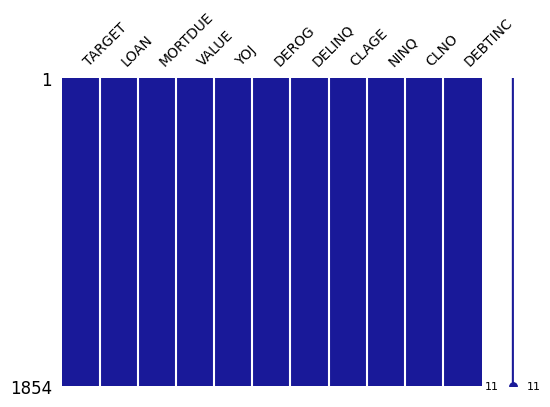

In [54]:
import missingno as msno
msno.matrix(dataset,figsize=(6, 4), fontsize=10, color=[0.1,0.1,0.6])

**Analizando el dataser podemos afirmar que:**

1. Las columnas no presentan valores faltantes
2. La variable objetivo "TARGET" se encuentra desbalanceada

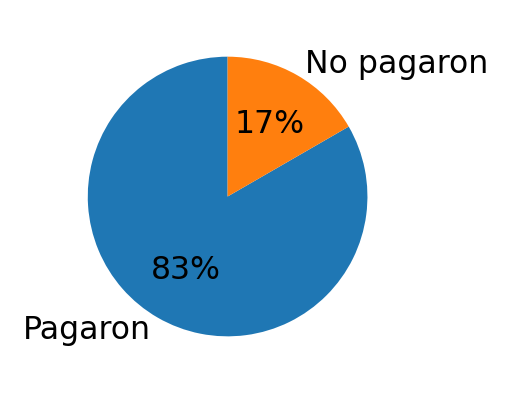

In [8]:
cant_pagaron = y.value_counts()[0]
cant_no_pagaron = y.value_counts()[1]

nombres_de_categorias = ['Pagaron', 'No pagaron']
cantidades = [cant_pagaron, cant_no_pagaron]

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(cantidades, labels=nombres_de_categorias, textprops={'fontsize': 10}, startangle=90, autopct='%1.0f%%')
plt.show()

Se puede apreciar que se disponde de un conjuto de datos desbalanceado en el que, de 1854 registros:
- 1545 (83%) corresponden a personas que pagaron el préstamo.
- 309 (17%) corresponden a personas en mora o que no pagaron.

**En base a esto vamos a utilizar el parametro "stratify" del metodo "train_test_split" de la libreria Sklearn**

In [9]:
# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

## Respuesta Ejercicio 1: Descripción de los Datos y la Tarea

1. ¿De qué se trata el conjunto de datos?

El conjunto de datos se trata de información sobre préstamos de solicitantes recientes a los que se les otorgó crédito, realizado por el departamento de créditos de un banco. 

El conjunto de datos es una fracción del conjunto de datos original que se encuentra en Kaggle (precisamente aquí 👉 [https://www.kaggle.com/ajay1735/hmeq-data](https://www.kaggle.com/ajay1735/hmeq-data)) sobre el valor acumulado de la vivienda (HMEQ, por sus siglas en inglés). El conjunto de datos original contiene información de línea de base y rendimiento de préstamos para 5960 préstamos sobre el valor acumulado de la vivienda recientes. Este conjunto de datos en particular tiene 1854 registros.

2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?

La variable objetivo es la variable 'TARGET'. La misma tiene las siguientes asignaciones y significado:


*   1 si el cliente incumplió el pago del préstamo
*   0 si el cliente cumplió el pago del préstamo

Esta es la variable que se utilizará para realizar la predicción de calificación crediticia de un nuevo solicitante, para poder decidir si se le debe otorgar o no un crédito.

3. ¿Qué información (atributos) hay disponible para hacer la predicción?

Vamos a detallar las columnas del dataset

In [10]:
dataset.columns

Index(['TARGET', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

Los atributos disponibles para realizar la predicción son:

*   LOAN - Importe solicitado en el préstamo.
*   MORTDUE - Monto adeudado sobre la hipoteca existente.
*   VALUE - Valor actual de la propiedad.
*   YOJ - Antigüedad en el trabajo actual.
*   DEROG - Número de informes despectivos importantes.
*   DELINQ - Número de líneas de crédito morosas
*   CLAGE - Antigüedad de la línea comercial más antigua en meses
*   NINQ - Número de líneas de crédito recientes
*   CLNO - Número de líneas de crédito
*   DEBTINC - Relación deuda-ingresos 

4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

Intuitivamente los atributos más determinantes para la predicción son aquellos relacionados con los antecedentes de incumplimiento crediticio, a saber: DEROG, DELINQ, DEBTINC y NINQ.

Los más determinantes creemos que son:
- DEROG   cantidad de reportes de degradación del score crediticio importantes
- DEBTINC relación deuda-ingresos
- DELINQ  cantidad de líneas de crédito morosas
- NINQ    cantidad de líneas de crédito recientes

Se puede ver la correlación entre las distintas variables

Text(0.5, 1.0, 'Matriz de correlación')

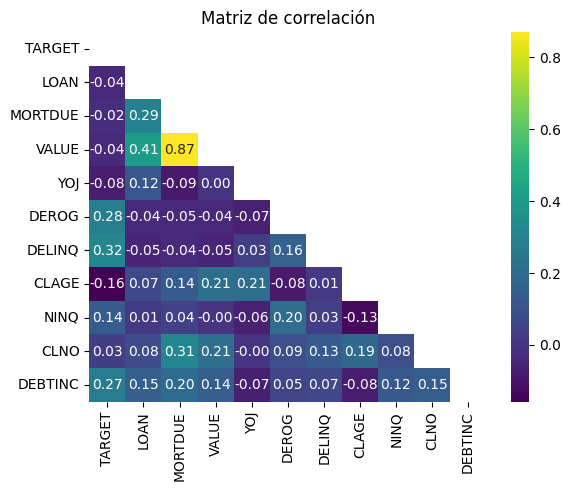

In [11]:
corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=corr, mask=mask, annot=True, fmt='.2f', cmap='viridis')
plt.title('Matriz de correlación')

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

### Respuesta Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

NOTACIÓN:
- $M:$ Morosos.
- $N:$ No Morosos.
- $T:$ True (Clientes clasificados como morosos)
- $F:$ False (Clientes clasificados como no morosos)
- $TM=$número de morosos correctamente clasificados.
- $TN=$número de no morosos correctamente clasificados.
- $FM=$número de morosos mal clasificados.
- $FN=$número de no morosos mal clasificados.

**Accuracy** (Exactitud):

Es la proporción de predicciones correctas (tanto clientes morosos como clientes no morosos) entre el total de predicciones realizadas por el modelo. Indica qué tan a menudo el modelo acierta. Es útil cuando las clases están balanceadas.  

$$\text{Accuracy}=\frac{TM+TN}{TM+FM+TN+FN}$$

**Precision** (Precisión):

Es la proporción de morosos dentro de los clasificados como morosos.  Indica la exactitud de las predicción de morosos del modelo. Es útil cuando el costo de una falsa alarma (falso positivo) es alto, como en este caso. Para el banco podría ser muy costoso clasificar a un moroso como no moroso
$$\text{Precision}=\frac{TM}{TM+FM}$$

**Recall** (Sensibilidad o Tasa de Verdaderos Positivos):

Proporción de Morosos clasificados correctamente entre todos los morosos.

$$\text{Recall}=\frac{TM}{TM+FM}$$

**F1 Score:** Media armónica entre la precisión y el recall.

Esta es otra métrica muy empleada porque resume la precisión y sensibilidad en una sola métrica. Es de gran utilidad cuando la distribución de las clases es desigual, como en este caso.

$$F1\text{ }Score=2.\frac{\text{Precision}.\text{Recall}}{\text{Precision+Recall}}$$

**Vamos a definir las funciones a fin de mostrar las metricas para los distintos modelos**

In [12]:
def metrics_display(model, X_test, y_test):
    test_prediction = model.predict(X_test)

    precision = precision_score(y_test, test_prediction)
    recall = recall_score(y_test, test_prediction)
    f1 = f1_score(y_test, test_prediction)
    accuracy = accuracy_score(y_test, test_prediction)

    print('Test results:')
    print(f'Precision:\t{precision:.3f}')
    print(f'Recall:\t\t{recall:.3f}')
    print(f'F1-Score:\t{f1:.3f}')
    print(f'Accuracy:\t{accuracy:.3f}')

    cm_test = confusion_matrix(y_test, test_prediction)
    plot_confusion_matrix(cm_test, 'Test')

    return test_prediction, [precision, recall, f1, accuracy]

def plot_confusion_matrix(cm, title):
    group_names = ['TN', 'FP', 'FN', 'TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_counts)]

    labels = np.asarray(labels).reshape(2, 2)

    fig, ax = plt.subplots(figsize=(3, 3))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Reds', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_xticklabels(['0', '1'])
    ax.set_yticklabels(['0', '1'])
    plt.show()

In [13]:
results = []

**Entrenamiento del modelo**

In [15]:
model = SGDClassifier(random_state=6)
model.fit(X_train, y_train)

SGDClassifier(random_state=6)

In [16]:
model1=Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=6))])

model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model', SGDClassifier(random_state=6))])

Predicción de valores de entrenamiento:

In [17]:
ypredtrain = model1.predict(X_train)

In [18]:
predicciones_correctas = (y_train == ypredtrain).sum()
print('Personas clasificadas correctamente:', predicciones_correctas)
predicciones_incorrectas = y_train.shape[0] - predicciones_correctas
print('Personas clasificadas incorrectamente:', predicciones_incorrectas)

Personas clasificadas correctamente: 1281
Personas clasificadas incorrectamente: 202


In [19]:
accuracy_train = accuracy_score(y_train, ypredtrain)

In [20]:
print(accuracy_train)

0.863789615643965


Predicción para los valores de evaluación:

In [21]:
ypred = model1.predict(X_test)

In [22]:
predicciones_correctas = (y_test == ypred).sum()
print('Personas clasificadas correctamente:', predicciones_correctas)
predicciones_incorrectas = y_test.shape[0] - predicciones_correctas
print('Personas clasificadas incorrectamente:', predicciones_incorrectas)

Personas clasificadas correctamente: 327
Personas clasificadas incorrectamente: 44


**Reporte de métricas para train y test:**

In [23]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, ypredtrain))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, ypred))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1236
           1       0.67      0.36      0.47       247

    accuracy                           0.86      1483
   macro avg       0.78      0.66      0.70      1483
weighted avg       0.85      0.86      0.85      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       309
           1       0.72      0.47      0.57        62

    accuracy                           0.88       371
   macro avg       0.81      0.72      0.75       371
weighted avg       0.87      0.88      0.87       371



**Metricas para datos de entrenamiento**

Test results:
Precision:	0.669
Recall:		0.360
F1-Score:	0.468
Accuracy:	0.864


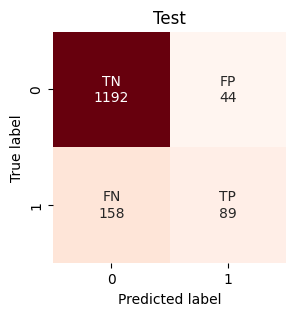

In [34]:
result, result_sgd_default = metrics_display(model1, X_train, y_train)
results.append(result)

**Metricas para datos de Test**

Test results:
Precision:	0.725
Recall:		0.468
F1-Score:	0.569
Accuracy:	0.881


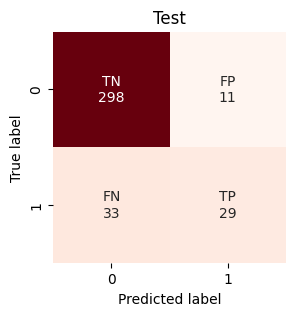

In [35]:
result, result_sgd_default = metrics_display(model1, X_test, y_test)
results.append(result)

Respecto a las métricas se puede observar que tanto en train como en test se mantiene un accuracy de 0.84, es decir que en el 84% de los casos el modelo va a clasificar correctamente un cliente en cumplidor o no cumplidor. Además si la entidad bancaria pone énfasis en los cumplidores, este modelo tiene un recall de 0.94 en test, esto quiere decir que el modelo es capaz de identificar el 94% de los clientes cumplidores y se equivocará sólo el 12% de las veces que los clasifique como tal (ya que su precisión es del 88%).

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Respuesta Ejercicio 2.2: Ajuste de Hiperparámetros

Se visualizan los parametros del modelo:

In [37]:
model.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 6,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

**Definición de parametros a comparar para encontar el mejor modelo (optimización)**

**Valores de hiperparámetros para ajuste:**
- Funciones de costo
  - _hinge_: SVM
  - _perceptron_: Algoritmo de perceptrón lineal
  - _log_: Regresión logística
- alpha: Constante que multiplica el término de regularización. Cuanto mayor sea el valor, más fuerte será la regularización.
  - 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1
- Tasa de aprendizaje
  - _constant_
  - _optimal_
  - _adaptative_

In [38]:
param_grid = {
    'model__loss': ['hinge', 'log', 'perceptron'],
    'model__learning_rate':['constant', 'optimal','adaptive'],
    'model__alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10],
     }

Utlizamos GridSearchCV para encontrar la mejor combinación de hiperparámetros.

In [39]:
model = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(random_state=6, eta0=0.1))])

cv = GridSearchCV(model, param_grid, scoring ='accuracy', refit=True, cv=5)
cv.fit(X_train, y_train);

C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\josez\AppData\Roaming\Python\Python39\site-packages\sklearn\pipeline.py", line 476, in fit
    

In [40]:
results = cv.cv_results_

data_sdg_classifier=pd.DataFrame(results)
data_sdg_classifier.sort_values('rank_test_score')[:6]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,param_model__learning_rate,param_model__loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.006305,0.000406,0.001698,0.000397,0.0005,adaptive,hinge,"{'model__alpha': 0.0005, 'model__learning_rate...",0.865320,0.861953,0.861953,0.881757,0.878378,0.869872,0.008482,1
42,0.007402,0.001356,0.002606,0.001250,0.0100,adaptive,hinge,"{'model__alpha': 0.01, 'model__learning_rate':...",0.865320,0.861953,0.865320,0.881757,0.871622,0.869194,0.007017,2
33,0.006401,0.000490,0.001402,0.000491,0.0050,adaptive,hinge,"{'model__alpha': 0.005, 'model__learning_rate'...",0.861953,0.865320,0.865320,0.881757,0.871622,0.869194,0.007017,2
6,0.007704,0.001540,0.001800,0.000400,0.0001,adaptive,hinge,"{'model__alpha': 0.0001, 'model__learning_rate...",0.865320,0.861953,0.861953,0.881757,0.871622,0.868521,0.007501,4
24,0.006302,0.000400,0.001501,0.000447,0.0010,adaptive,hinge,"{'model__alpha': 0.001, 'model__learning_rate'...",0.865320,0.861953,0.861953,0.881757,0.871622,0.868521,0.007501,4
39,0.004902,0.000920,0.001801,0.000400,0.0100,optimal,hinge,"{'model__alpha': 0.01, 'model__learning_rate':...",0.865320,0.861953,0.858586,0.878378,0.868243,0.866496,0.006765,6


In [41]:
data_sdg_classifier[['param_model__learning_rate','param_model__loss','param_model__alpha','mean_test_score','std_test_score','rank_test_score']].sort_values(by='rank_test_score', ascending=True).head(5)

,param_model__learning_rate,param_model__loss,param_model__alpha,mean_test_score,std_test_score,rank_test_score
15,adaptive,hinge,0.0005,0.869872,0.008482,1
42,adaptive,hinge,0.0100,0.869194,0.007017,2
33,adaptive,hinge,0.0050,0.869194,0.007017,2
6,adaptive,hinge,0.0001,0.868521,0.007501,4
24,adaptive,hinge,0.0010,0.868521,0.007501,4


Como se puede observar en la grilla, los hiperparámetros mejor rankeados son:
* $\alpha=0.0005$
* $\eta$= adaptive
* loss = hinge

El accuracy promedio resultante de realizar las 5 capas en la validación cruzada es $0.875921$ con una desviasión estándar de $0.015315$.

**Seleccion del mejor modelo**

In [42]:
BM = Pipeline([('standardscaler', StandardScaler()), ('model',SGDClassifier(alpha=0.0005, loss='hinge', max_iter=3000, random_state=6, eta0=0.1, learning_rate='adaptive'))])

**Entrenamiento del mejor modelo**

In [43]:
BM.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('model',
                 SGDClassifier(alpha=0.0005, eta0=0.1, learning_rate='adaptive',
                               max_iter=3000, random_state=6))])

Predicción de valores de entrenamiento

In [44]:
ypredtrain_bm = BM.predict(X_train)

Predicción de valores de evaluación

In [45]:
ypred_bm = BM.predict(X_test)

**Reporte de métricas para el mejor modelo**

In [46]:
print(f'Reporte de métricas de entrenamiento\n------------------------------------------------------')
print(classification_report(y_train, ypredtrain_bm))
print(f'Reporte de métricas de evaluación\n-------------------------------------------------------')
print(classification_report(y_test, ypred_bm))

Reporte de métricas de entrenamiento
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1236
           1       0.93      0.25      0.39       247

    accuracy                           0.87      1483
   macro avg       0.90      0.62      0.66      1483
weighted avg       0.88      0.87      0.84      1483

Reporte de métricas de evaluación
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.91      0.32      0.48        62

    accuracy                           0.88       371
   macro avg       0.89      0.66      0.70       371
weighted avg       0.88      0.88      0.86       371



**Matriz de confusión**

1) Para la instancia de entrenamiento

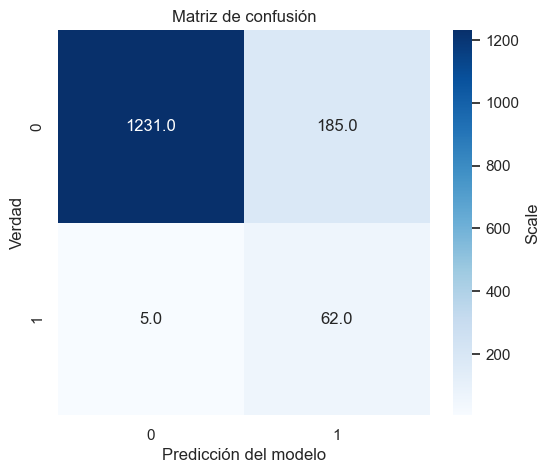

In [110]:
cm_bm = confusion_matrix(y_train, ypredtrain_bm)

sns.set_theme(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )
# define labels
labels = ["0", "1"] 
sns.set_theme(font_scale=1)
ax = sns.heatmap(cm_bm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel='Verdad', xlabel="Predicción del modelo")

plt.show()

2) Para la instancia de evaluación

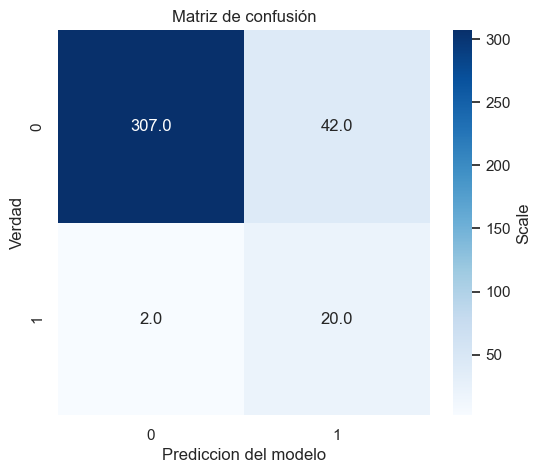

In [111]:
from sklearn.metrics import confusion_matrix
cm1_bm = confusion_matrix(y_test, ypred_bm)

sns.set_theme(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Matriz de confusión" )
# define labels
labels = ["0", "1"] 
sns.set_theme(font_scale=1)
ax = sns.heatmap(cm1_bm.T, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Verdad", xlabel="Prediccion del modelo")

plt.show()

Parece que con esta optimización el modelo mejora las métricas, tanto para clasificar en cumplidores y no cumplidores. El accuracy en test ahora es de 0.88, esto significa que 80 de cada 100 casos serán clasificados correctamente, el resto de las métricas tanto para casos 0 como 1 también fueron mejoradas, haciendo especial hincapié en el recall de clientes cumplidores donde ahora es del 99% en test pero el 13% de las veces se equivocará (contra un 12% en el modelo sin optimizar).

Si observamos la matriz de confusión en la instancia de evaluación se ve que el modelo trabaja bien si el objetivo es enfocarse en cumplidores. Sin embargo hay que tener en cuenta que el dataset está desequilibrado y aunque se tomó el recaudo en la parte de la separación en train y test por medio del argumento "stratify", esto afecta a las métricas individuales para los no cumplidores. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Respuesta Ejercicio 3.1

In [55]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier??

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are 

In [56]:
# Crear un clasificador DecisionTreeClassifier sin parámetros explícitos
clf1 = DecisionTreeClassifier(random_state=42)

# Imprimir los valores por defecto de los parámetros
print(clf1.get_params())

clf1.fit(X_train, y_train)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


DecisionTreeClassifier(random_state=42)

In [57]:
# Ahora predecimos:
y1_train_pred = clf1.predict(X_train)
y1_test_pred = clf1.predict(X_test)

# Y evaluamos:
from sklearn.metrics import accuracy_score

train1_acc = accuracy_score(y_train, y1_train_pred)
test1_acc = accuracy_score(y_test, y1_test_pred)
print(f'Train accuracy: {train1_acc:0.2}')
print(f'Test accuracy: {test1_acc:0.2}')
print()
train1_prec = precision_score(y_train, y1_train_pred)
test1_prec = precision_score(y_test, y1_test_pred)
print(f'Train precision: {train1_prec:0.2}')
print(f'Test precision: {test1_prec:0.2}')
print()
train1_recall = recall_score(y_train, y1_train_pred)
test1_recall = recall_score(y_test, y1_test_pred)
print(f'Train recall: {train1_recall:0.2}')
print(f'Test recall: {test1_recall:0.2}')
print()
train1_f1 = f1_score(y_train, y1_train_pred)
test1_f1 = f1_score(y_test, y1_test_pred)
print(f'Train f1: {train1_f1:0.2}')
print(f'Test f1: {test1_f1:0.2}')

Train accuracy: 1.0
Test accuracy: 0.89

Train precision: 1.0
Test precision: 0.69

Train recall: 1.0
Test recall: 0.61

Train f1: 1.0
Test f1: 0.65


 Los resultados muestran un rendimiento muy bueno en todas las métricas (accuracy, precision, recall, F1-score), lo cual indica que el modelo se ajusta muy bien a los datos de entrenamiento. No obstante, para el conjunto de evaluación aunque la exactitud es alta (89%), las métricas de precision, recall y F1-score son significativamente más bajas que en el conjunto de entrenamiento. Esto sugiere que el modelo no generaliza tan bien como en el conjunto de entrenamiento, mostrando una capacidad limitada para clasificar correctamente.

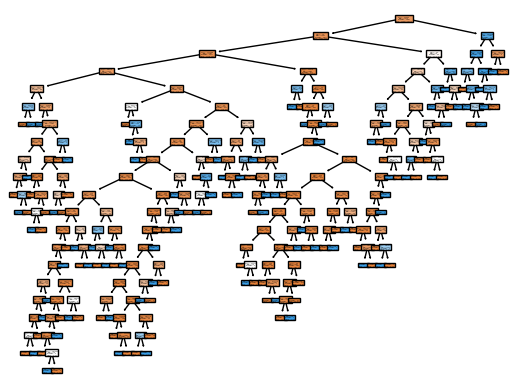

In [58]:
from sklearn.tree import plot_tree

plot_tree(clf1,filled=True);

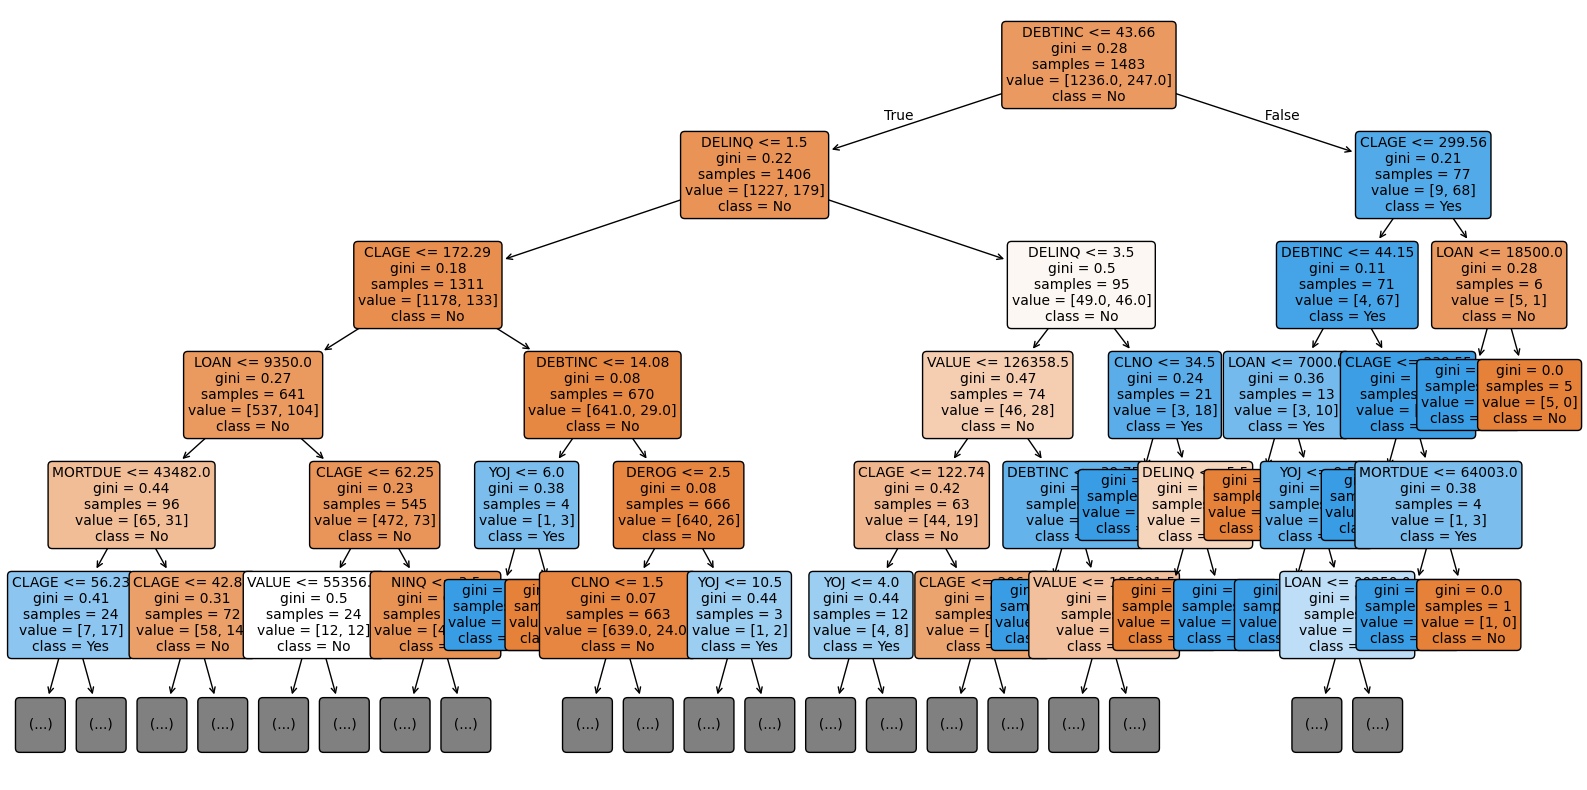

In [59]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf1, filled=True, feature_names=X.columns, class_names=['No', 'Yes'],
          rounded=True, fontsize=10, precision=2, max_depth=5)  # Ajusta max_depth según sea necesario
plt.savefig('tree.png')  # Guardar como archivo de imagen
plt.show()

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [60]:
DecisionTreeClassifier??

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
    monotonic_cst=None,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are 

In [62]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Crear el clasificador DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid2 = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Diferentes criterios de partición
    'max_depth': [3, 4, 5, 8, 10, 15],  # Profundidad máxima del árbol
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]  # Cantidad mínima de muestras por hoja
}

# Configurar GridSearchCV con validación cruzada de 5 folds
grid2_search = GridSearchCV(estimator=clf, param_grid=param_grid2, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Ejecutar la búsqueda de hiperparámetros en el conjunto de entrenamiento
grid2_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor puntaje
best_params2 = grid2_search.best_params_
best_score2 = grid2_search.best_score_

print(f'Mejores hiperparámetros: {best_params2}')
print(f'Mejor puntaje de validación cruzada: {best_score2:.4f}')

# Entrenar un nuevo modelo con la mejor configuración de parámetros
best_model2 = DecisionTreeClassifier(**best_params2)
best_model2.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
test2_accuracy = best_model2.score(X_test, y_test)
print(f'Accuracy en el conjunto de prueba: {test2_accuracy:.4f}')
print("Mejor modelo:", best_model2)

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Mejor puntaje de validación cruzada: 0.8955
Accuracy en el conjunto de prueba: 0.8814
Mejor modelo: DecisionTreeClassifier(criterion='entropy', max_depth=8)


In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import matplotlib.pyplot as plt

# Obtener los resultados de la búsqueda de hiperparámetros
results2 = grid2_search.cv_results_

# Crear un DataFrame con los resultados relevantes
df2 = pd.DataFrame({
    'mean_test_accuracy': results2['mean_test_score'],
    'std_test_accuracy': results2['std_test_score'],
    'params': results2['params']
})

# Ordenar el DataFrame por accuracy promedio en orden decreciente
df2 = df2.sort_values(by='mean_test_accuracy', ascending=False)

# Agregar una columna con la numeración de las configuraciones
df2.insert(0, 'config_number', range(1, len(df2) + 1))

# Crear una tabla usando tabulate y resaltar la mejor configuración
table = []
for i, row in df2.iterrows():
    if i == df2.index[0]:
        table.append([f"\033[1;34m{row['config_number']}\033[0m", f"\033[1;34m{row['mean_test_accuracy']:.4f}\033[0m", f"\033[1;34m{row['std_test_accuracy']:.4f}\033[0m", f"\033[1;34m{row['params']}\033[0m"])
    else:
        table.append([row['config_number'], f"{row['mean_test_accuracy']:.4f}", f"{row['std_test_accuracy']:.4f}", row['params']])

# Imprimir la tabla
print(tabulate(table, headers=['Config Number', 'Mean Test Accuracy', 'Std Test Accuracy', 'Parameters'], tablefmt='grid'))



+-----------------+----------------------+---------------------+--------------------------------------------------------------------+
|   Config Number |   Mean Test Accuracy |   Std Test Accuracy | Parameters                                                         |
+=================+======================+=====================+====================================================================+
|               1 |               0.8955 |              0.0188 | {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}    |
+-----------------+----------------------+---------------------+--------------------------------------------------------------------+
|               2 |               0.8955 |              0.0188 | {'criterion': 'log_loss', 'max_depth': 8, 'min_samples_leaf': 1}   |
+-----------------+----------------------+---------------------+--------------------------------------------------------------------+
|               3 |               0.8948 |              0.0144

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Obtener los mejores parámetros y el mejor puntaje
best_params2 = grid2_search.best_params_
best_score2 = grid2_search.best_score_

print(f'Mejores hiperparámetros: {best_params2}')
print(f'Mejor puntaje de validación cruzada: {best_score2:.4f}')

# Aquí debes usar los mejores parámetros encontrados por GridSearchCV
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}
best_params2 = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_leaf': 10
}

# Crear el clasificador con los mejores parámetros
best_model2 = DecisionTreeClassifier(**best_params2, random_state=42)

# Entrenar el mejor modelo en el conjunto de entrenamiento
best_model2.fit(X_train, y_train)

# Predecir sobre el conjunto de entrenamiento y evaluación
y_train_pred2 = best_model2.predict(X_train)
y_test_pred2 = best_model2.predict(X_test)

# Calcular métricas para el conjunto de entrenamiento
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
train_precision2 = precision_score(y_train, y_train_pred2, average='macro')
train_recall2 = recall_score(y_train, y_train_pred2, average='macro')
train_f12 = f1_score(y_train, y_train_pred2, average='macro')

# Calcular métricas para el conjunto de evaluación
test_accuracy2 = accuracy_score(y_test, y_test_pred2)
test_precision2 = precision_score(y_test, y_test_pred2, average='macro')
test_recall2 = recall_score(y_test, y_test_pred2, average='macro')
test_f12 = f1_score(y_test, y_test_pred2, average='macro')

table = [
    ['Conjunto de Entrenamiento', train_accuracy2, train_precision2, train_recall2, train_f12],
    ['Conjunto de Evaluación', test_accuracy2, test_precision2, test_recall2, test_f12]
]

# Imprimir la tabla usando tabulate
headers = ['Conjunto', 'Accuracy', 'Precision', 'Recall', 'F1-score']
print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="grid"))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1}
Mejor puntaje de validación cruzada: 0.8955
+---------------------------+------------+-------------+----------+------------+
| Conjunto                  |   Accuracy |   Precision |   Recall |   F1-score |
+===========================+============+=============+==========+============+
| Conjunto de Entrenamiento |     0.8928 |      0.8961 |   0.6960 |     0.7468 |
+---------------------------+------------+-------------+----------+------------+
| Conjunto de Evaluación    |     0.8706 |      0.8152 |   0.6580 |     0.6965 |
+---------------------------+------------+-------------+----------+------------+


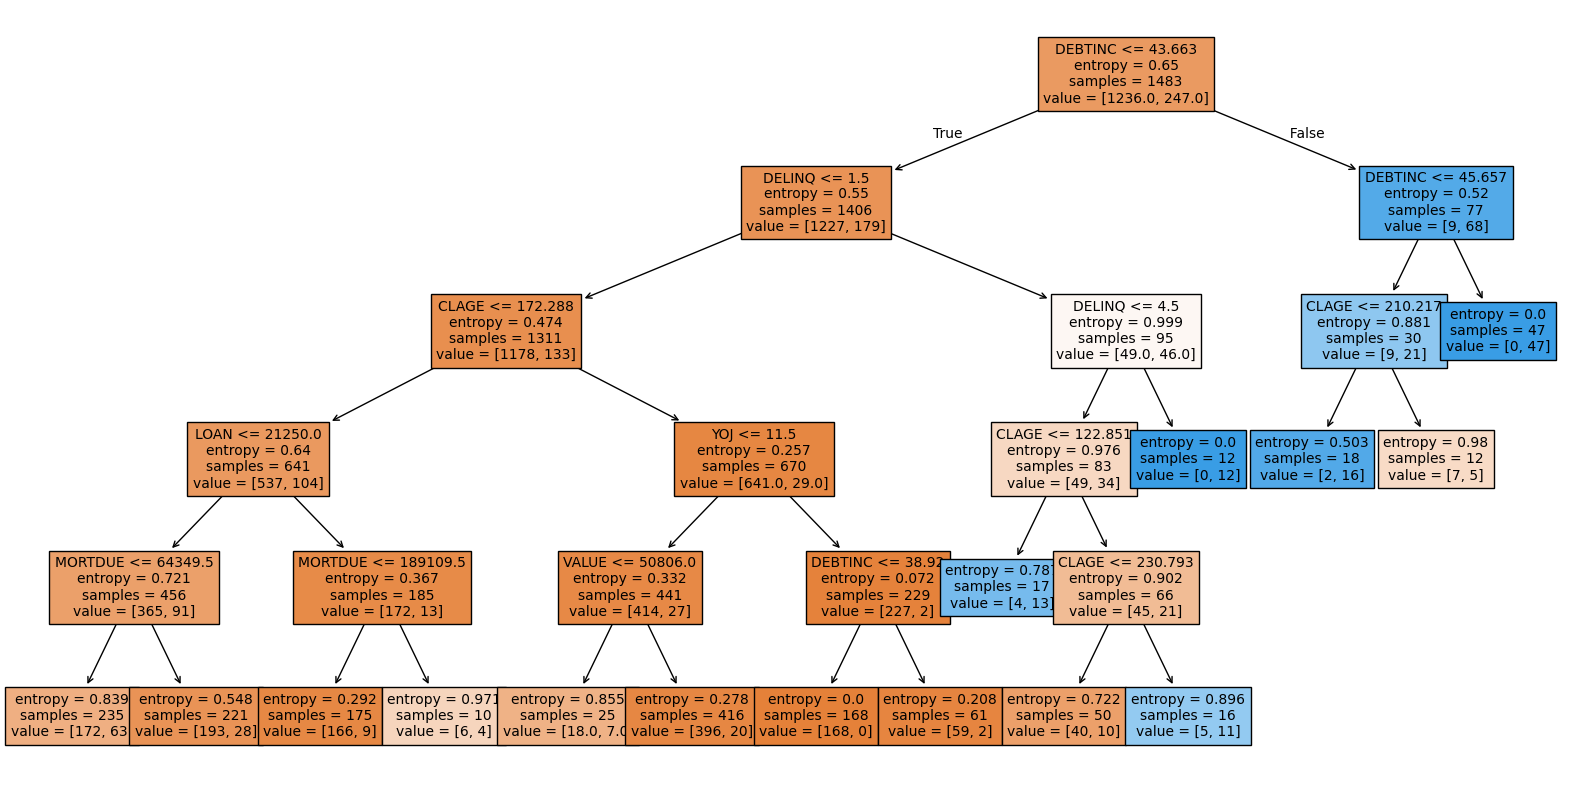

In [66]:
plt.figure(figsize=(20,10))
plot_tree(best_model2,  feature_names=X.columns, filled=True, fontsize=10)  # Ajusta 'fontsize' según el tamaño deseado
plt.show()

**Este modelo da mejores métricas de precisión y recall que el brindado por SGDClassifier y, teniendo en cuenta el desbalance de los datos respecto a las categorías de clasificación, DecisiónTreeClassifier dá un poco más de seguridad si el modelo quiere utilizarse para saber si el la persona clasifica como no cumplidora puesto que el Recall para el clasificar "DecisionTreeClassifier" da mucho mejor que contra el modelo "SGDClassifier" optimizado.**